In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [45]:
df=pd.read_csv("C:\\Users\\varun\\Downloads\\SeoulBikeData.csv")
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Prepare the Data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [47]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [48]:
df.describe(include='O')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01-12-2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


In [49]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

## Process the Data

In [50]:
season=df.groupby(df["Seasons"])["Rented Bike Count"].sum()
season=pd.DataFrame(season).reset_index().sort_values(by="Rented Bike Count",ascending=False)
season

,Seasons,Rented Bike Count
2,Summer,2283234
0,Autumn,1790002
1,Spring,1611909
3,Winter,487169


Text(0.5, 1.0, 'Seasonwise Total Bike Rental Distribution')

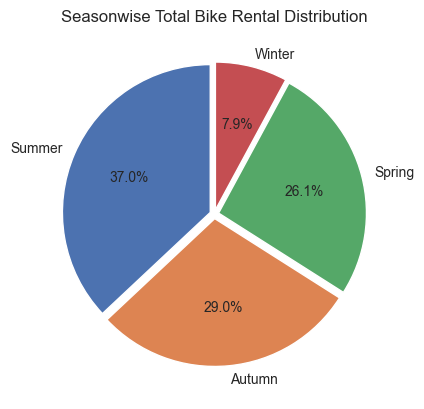

In [51]:
plt.pie(season["Rented Bike Count"],labels=season["Seasons"],autopct='%1.1f%%', startangle=90,explode=(0.03, 0.03, 0.03,0.03),colors = sns.color_palette("deep", len(season["Seasons"])),labeldistance=1.09)
plt.title("Seasonwise Total Bike Rental Distribution")

In [52]:
df['Year'] = df['Date'].dt.year
year=df.groupby(df['Year'])["Rented Bike Count"].sum()
year=pd.DataFrame(year)
year


,Rented Bike Count
Year,
2017,185330
2018,5986984


In [53]:
df['Month'] = df['Date'].dt.strftime('%B')
df["Num_Month"]=df['Date'].dt.month
month=df.groupby([df['Month'],df["Num_Month"]])["Rented Bike Count"].sum()
month=pd.DataFrame(month).reset_index()
month=month.sort_values(by="Num_Month",ascending=True)


<function matplotlib.pyplot.show(close=None, block=None)>

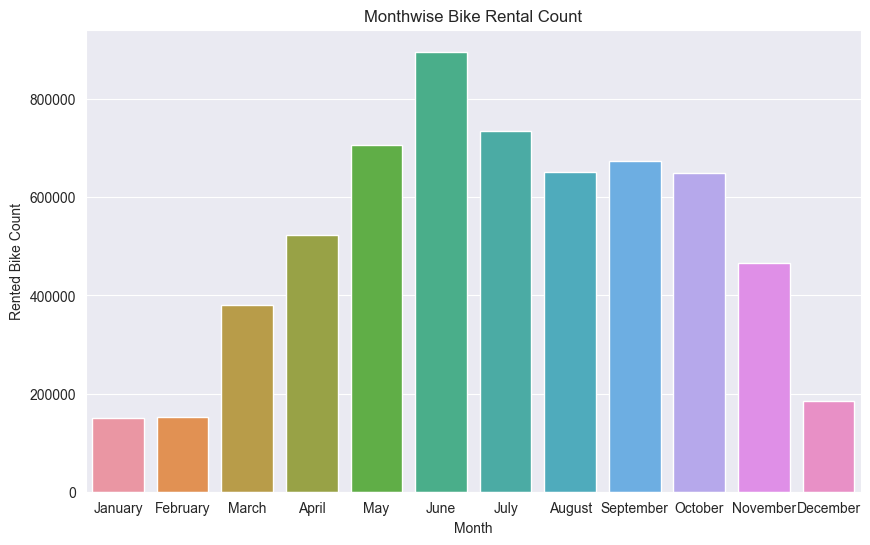

In [54]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.barplot(y=month["Rented Bike Count"], x=month["Month"])
plt.title("Monthwise Bike Rental Count")
plt.show

Text(0.5, 1.0, 'Hour Wise Rental Count')

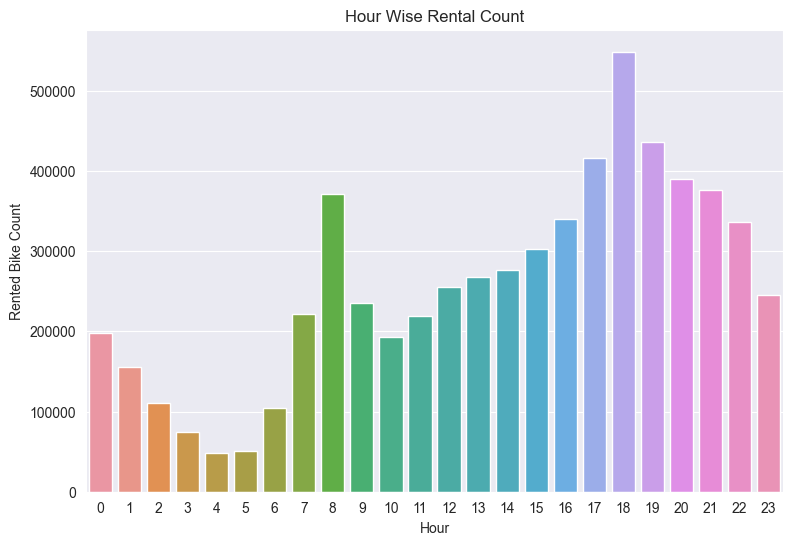

In [55]:
hourly=df.groupby("Hour")["Rented Bike Count"].sum()
hourly=pd.DataFrame(hourly).reset_index()
plt.figure(figsize=(9,6))
sns.barplot(y=hourly["Rented Bike Count"], x=hourly["Hour"])
plt.title("Hour Wise Rental Count")

In [56]:
holiday=df.groupby(df["Holiday"])["Rented Bike Count"].sum()
holiday.to_frame()

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


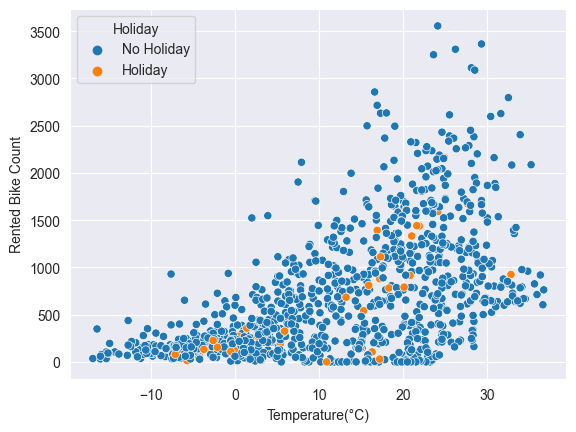

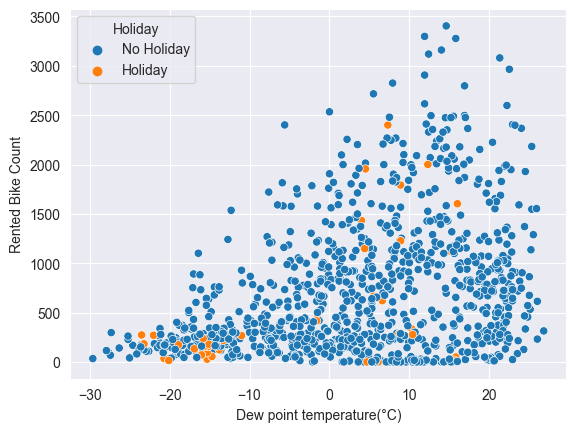

In [57]:
sns.scatterplot(x="Temperature(°C)",y="Rented Bike Count",hue="Holiday",data=df.sample(1000,random_state=42))
plt.show()
sns.scatterplot(x="Dew point temperature(°C)",y="Rented Bike Count",hue="Holiday",data=df.sample(1000,random_state=2))
plt.show()

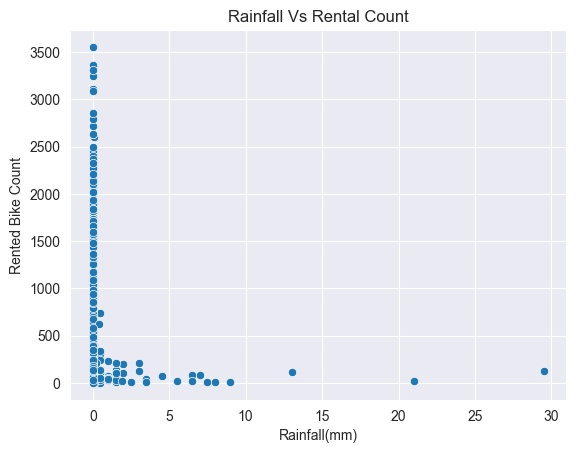

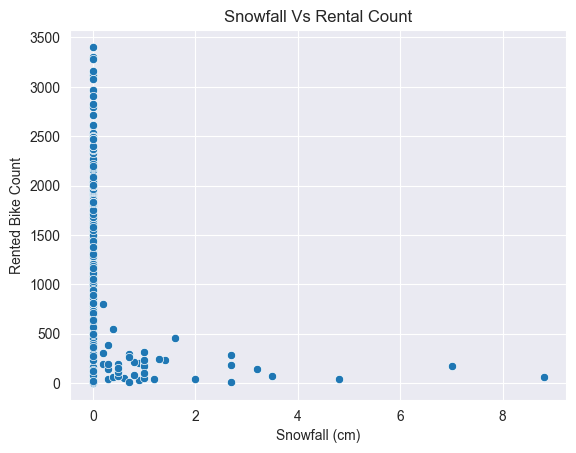

In [58]:
sns.scatterplot(x="Rainfall(mm)",y="Rented Bike Count",data=df.sample(1000,random_state=42))
plt.title("Rainfall Vs Rental Count")
plt.show()
sns.scatterplot(x="Snowfall (cm)",y="Rented Bike Count",data=df.sample(1000,random_state=2))
plt.title("Snowfall Vs Rental Count")
plt.show()

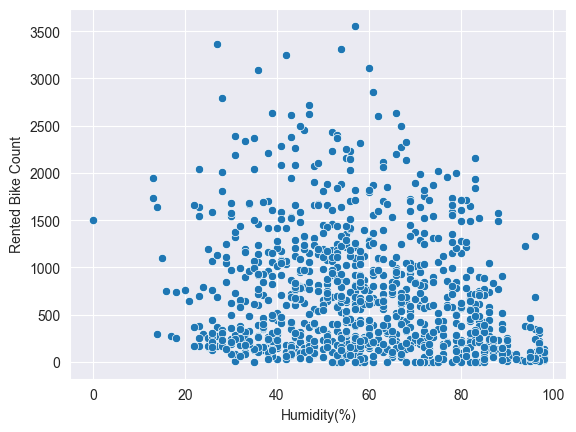

In [59]:
sns.scatterplot(x="Humidity(%)",y="Rented Bike Count",data=df.sample(1000,random_state=42))
plt.show()


In [60]:
df.corr(numeric_only=True)["Rented Bike Count"].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Year                         0.215162
Visibility (10m)             0.199280
Num_Month                    0.133514
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64

<Axes: >

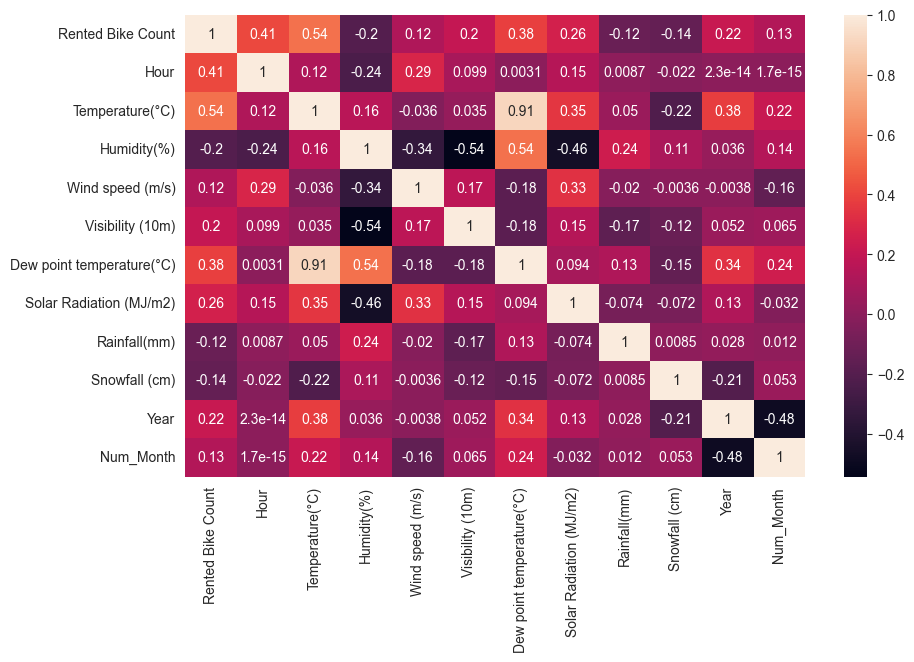

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [62]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Num_Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,11


<Axes: >

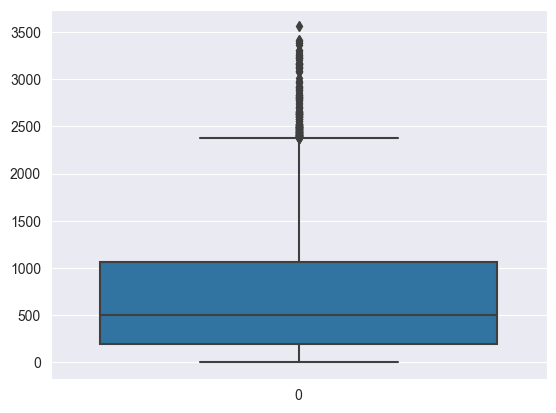

In [63]:
sns.boxplot(df.iloc[:,1])

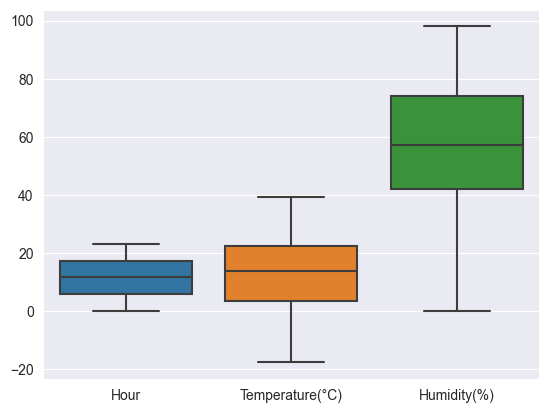

<Axes: >

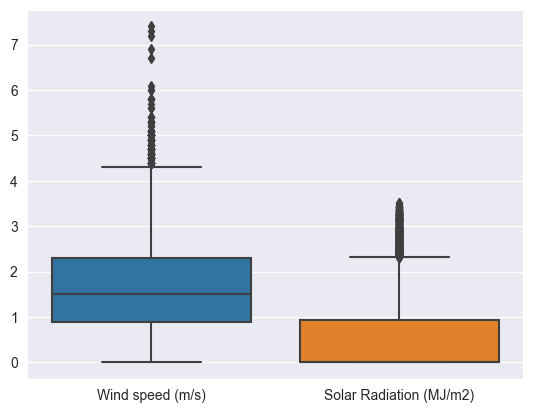

In [64]:
sns.boxplot(df.iloc[:,2:5])
plt.show()
sns.boxplot(df.iloc[:,[5,8]])


# Predictive Analytics

In [65]:
df=pd.get_dummies(df,columns=["Seasons","Holiday"],drop_first=True,dtype='int')

In [66]:
x=df.drop(columns=["Date","Year","Month","Functioning Day","Rented Bike Count"])
y=df["Rented Bike Count"]

In [67]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [68]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [69]:
from sklearn.metrics import r2_score,mean_squared_error
pred=model.predict(x_test)
print("R2 Score of Linear Regression Model:",r2_score(y_test,pred))
print("MSE of Linear Regression Model:",mean_squared_error(y_test,pred))

R2 Score of Linear Regression Model: 0.48624317685845253
MSE of Linear Regression Model: 227957.75344829416


In [70]:
from xgboost import XGBRegressor
model1=XGBRegressor()
model1.fit(x_train,y_train)

param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}

random_search = RandomizedSearchCV(
    model1, param_distributions=param_dist, n_iter=10,
    scoring='neg_mean_squared_error', cv=5, random_state=42, verbose=1, n_jobs=-1
)

random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Negative Mean Squared Error:", random_search.best_score_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
Best Negative Mean Squared Error: -81626.7042543868


In [71]:
pred=model1.predict(x_test)
print("R2 Score of XGBRegressor Model:",r2_score(y_test,pred))
print("MSE of XGBRegressor Model:",mean_squared_error(y_test,pred))


R2 Score of XGBRegressor Model: 0.82398823347051
MSE of XGBRegressor Model: 78097.74015881761


In [72]:
test_predictions = random_search.predict(x_test)
print("R2 Score of Random Search XGBRegressor Model:",r2_score(y_test,test_predictions))
print("MSE of Random Search XGBRegressor Model:",mean_squared_error(y_test,test_predictions))

R2 Score of Random Search XGBRegressor Model: 0.8298894026899133
MSE of Random Search XGBRegressor Model: 75479.34714216122


C:\Users\varun\AppData\Local\Temp\ipykernel_25020\2875320808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, label='Actual Distribution')
C:\Users\varun\AppData\Local\Temp\ipykernel_25020\2875320808.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

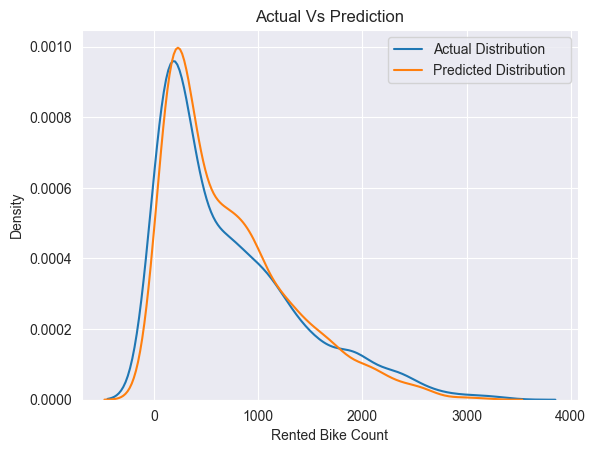

In [73]:
ax1 = sns.distplot(y_test, hist=False, label='Actual Distribution')
sns.distplot(test_predictions, hist=False, ax=ax1, label='Predicted Distribution')
plt.legend()
plt.title("Actual Vs Prediction")
plt.show()